## Hypothesing Tests

### Autor: Sangeeths Chandrakumar

### Importieren der benötigten Bibliotheken

In [1]:
# Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Laden der Daten

In [2]:
heart_data = pd.read_csv('heart.csv')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Eiblick in die Daten

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### T-Test

#### Voraussetzungen für den T-Test

Darstellung beider Gruppen:
Wir werden die Altersverteilung der Patienten mit Herzkrankheiten (target = 1) und ohne Herzkrankheiten (target = 0) darstellen.

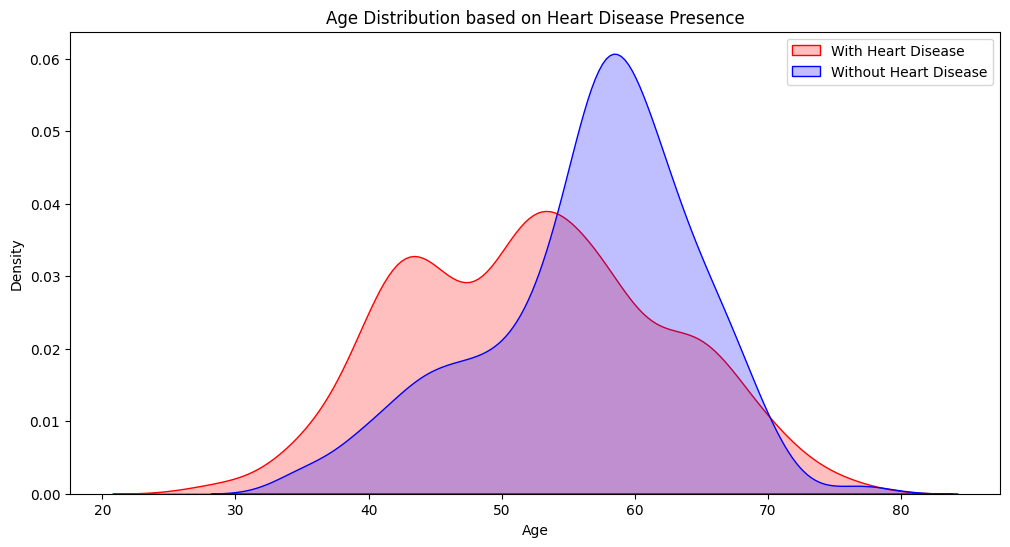

In [4]:
# Splitting the age data into two groups based on the target value
age_with_disease = heart_data[heart_data['target'] == 1]['age']
age_without_disease = heart_data[heart_data['target'] == 0]['age']


plt.figure(figsize=(12, 6))

sns.kdeplot(age_with_disease, fill=True, label='With Heart Disease', color='r')
sns.kdeplot(age_without_disease, fill=True, label='Without Heart Disease', color='b')

plt.title('Age Distribution based on Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()


1. Die rote Kurve repräsentiert Patienten mit Herzkrankheiten.
2. Die blaue Kurve repräsentiert Patienten ohne Herzkrankheiten.

### Hypothesentest

H0: Das durchschnittliche Alter von Patienten mit Herzkrankheiten ist gleich dem Durchschnittsalter von Patienten ohne Herzkrankheiten.
H1: Das durchschnittliche Alter von Patienten mit Herzkrankheiten ist nicht gleich dem Durchschnittsalter von Patienten ohne Herzkrankheiten.

### Kontrolle der Hypothesen

#### Normalverteilung
Wir werden die Q-Q-Plots für beide Gruppen (mit und ohne Herzkrankheiten) verwenden, um die Normalverteilung der Daten zu überprüfen.

Text(0.5, 1.0, 'Age Distribution without Heart Disease')

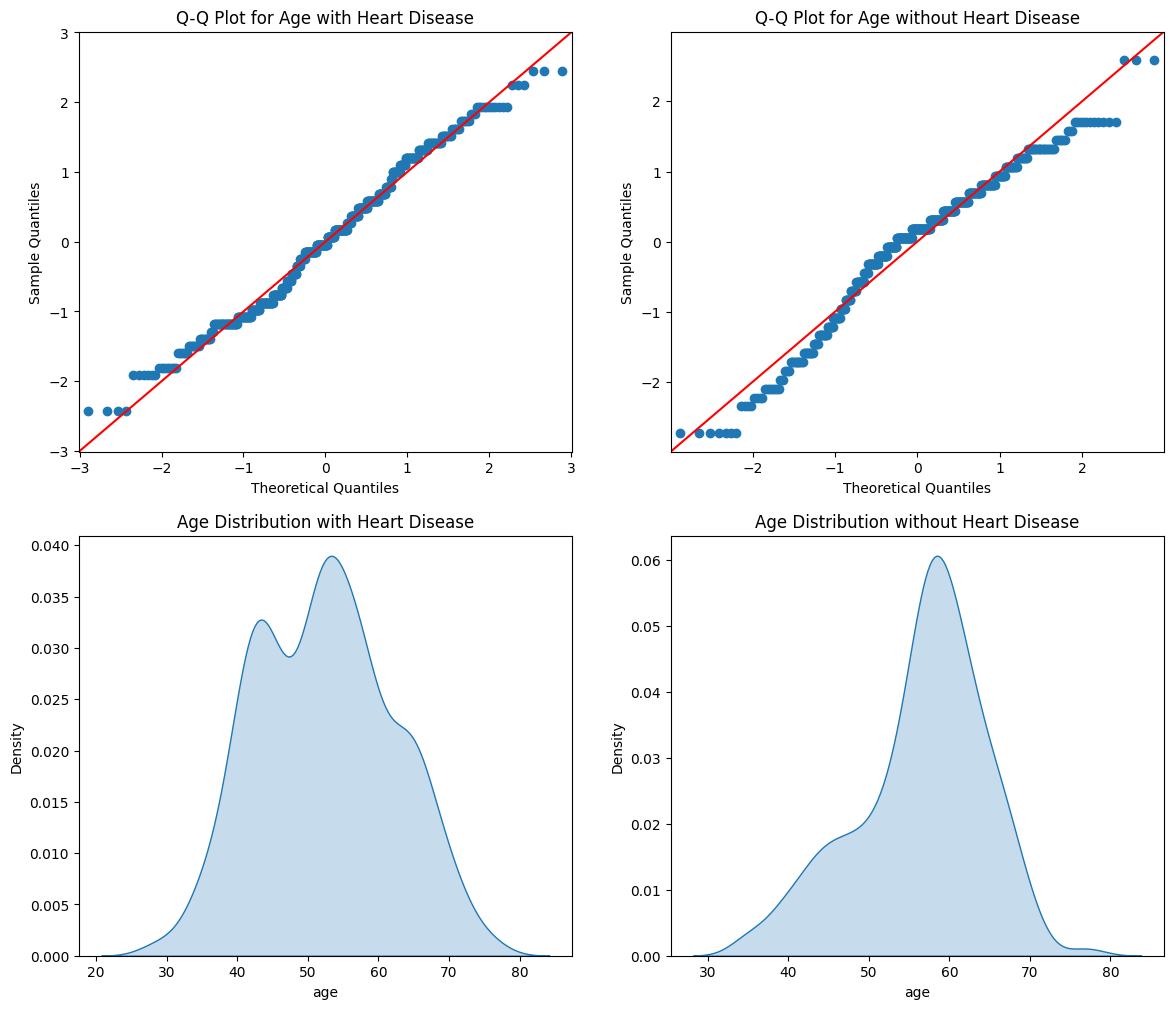

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

#qqplot for age with heart disease
sm.qqplot(age_with_disease, line='45', fit=True, ax=axs[0][0])
axs[0][0].set_title('Q-Q Plot for Age with Heart Disease')

#qqplot for age without heart disease
sm.qqplot(age_without_disease, line='45',fit=True, ax=axs[0][1])
axs[0][1].set_title('Q-Q Plot for Age without Heart Disease')

#barplot for age with heart disease
sns.kdeplot(age_with_disease, fill=True, ax=axs[1][0])
axs[1][0].set_title('Age Distribution with Heart Disease')

#barplot for age without heart disease
sns.kdeplot(age_without_disease, fill=True, ax=axs[1][1])
axs[1][1].set_title('Age Distribution without Heart Disease')


#Standatisierte Normalverteilung 0-1 -> fit=True


1. Der linke obere Plot zeigt die Verteilung für Patienten mit Herzkrankheiten.
    1. Die meisten Datenpunkte liegen nahe der 45-Grad-Linie, insbesondere in der Mitte der Verteilung.
    2. Es gibt jedoch einige Abweichungen an den Enden, was auf leichte Abweichungen von einer Normalverteilung in den Schwänzen hinweist.
2. Der rechte obere Plot zeigt die Verteilung für Patienten ohne Herzkrankheiten.
    1. Auch hier liegen die meisten Datenpunkte in der Mitte nahe der 45-Grad-Linie.
    2. Es gibt jedoch wiederum Abweichungen an den Enden, insbesondere im oberen Schwanz.

#### Homoskedastizität
Wir werden den Levene-Test verwenden, um die Gleichheit der Varianzen der beiden Gruppen zu überprüfen.

In [6]:
# Check for Homoscedasticity using the Levene's Test
levene_test_result = stats.levene(age_with_disease, age_without_disease)

levene_test_result


LeveneResult(statistic=30.83786928129634, pvalue=3.574862161939592e-08)

Da der p-Wert deutlich kleiner als 0,05 ist, müssen wir die Nullhypothese des Levene-Tests ablehnen, was bedeutet, dass die Varianzen zwischen den beiden Gruppen nicht gleich sind (also Homoskedastizität ist nicht erfüllt).

#### Durchführung des T-Tests und Darstellung der Ergebnisse

Da die Homoskedastizität nicht erfüllt ist (basierend auf dem Levene-Test), werden wir den T-Test mit der Annahme unterschiedlicher Varianzen durchführen.

In [7]:
# Perform the t-test assuming unequal variances
t_test_result = stats.ttest_ind(age_with_disease, age_without_disease, equal_var=False)

t_test_result


Ttest_indResult(statistic=-7.57436830024299, pvalue=8.180248047398552e-14)

Da der p-Wert deutlich kleiner als 0,05 ist, müssen wir die Nullhypothese ablehnen. Dies deutet darauf hin, dass es einen signifikanten Unterschied im Durchschnittsalter zwischen Patienten mit Herzkrankheiten und Patienten ohne Herzkrankheiten gibt.

#### Wilcoxon-Rangsummentest

Bei der Überprüfung der Voraussetzungen des T-Tests stellten wir jedoch fest, dass die Varianzen zwischen den Gruppen nicht gleich waren. Daher entschieden wir uns für den Wilcoxon Rank Sums Test als geeigneten nichtparametrischen Test.

In [8]:
wilcoxon_test_result = stats.ranksums(age_with_disease, age_without_disease, alternative='two-sided')

wilcoxon_test_result

RanksumsResult(statistic=-7.685262244508298, pvalue=1.5268390945395168e-14)

Da der p-Wert deutlich kleiner als 0,05 ist, müssen wir die Nullhypothese ablehnen. Dies zeigt, dass es einen signifikanten Unterschied im Alter zwischen Patienten mit und ohne Herzkrankheiten gibt.

## Aufgabe 2

### ANOVA

#### Kateogrische Variablen

In [9]:
# Check unique values in categorical columns to find suitable columns with more than two categories
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
category_counts = {col: heart_data[col].nunique() for col in categorical_columns}

category_counts


{'sex': 2, 'cp': 4, 'fbs': 2, 'restecg': 3, 'exang': 2, 'slope': 3, 'thal': 4}

Für den ANOVA-Test sollten wir eine kategoriale Variable mit mehr als zwei Kategorien auswählen. Die Variablen cp, restecg, slope, ca und thal erfüllen dieses Kriterium.

#### Beschreibung der Variablen:
1. Kontinuierliche Variable: age
2. Kategoriale Variable: cp (Brustschmerztyp)

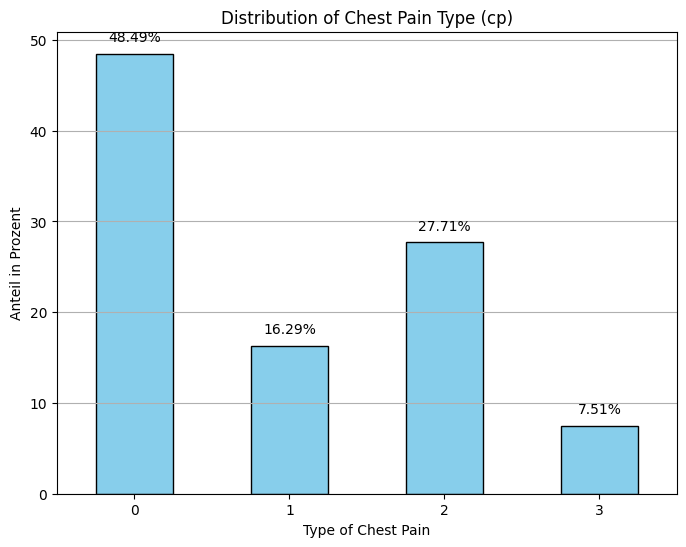

0    48.487805
1    16.292683
2    27.707317
3     7.512195
Name: cp, dtype: float64

In [10]:
# Display the distribution of the 'cp' variable
cp_distribution = heart_data['cp'].value_counts(normalize=True).sort_index() * 100  # Prozentuale Verteilung

plt.figure(figsize=(8, 6))
ax = cp_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Chest Pain Type (cp)')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Anteil in Prozent')
plt.xticks(rotation=0)
plt.grid(axis='y')


for i, percent in enumerate(cp_distribution):
    plt.text(i, percent + 1, f'{percent:.2f}%', ha='center', va='bottom')

plt.show()

cp_distribution


#### Hypothese für den ANOVA-Test:

H0: Das durchschnittliche Alter ist in allen Brustschmerztypen gleich.
H1: Das durchschnittliche Alter ist nicht in allen Brustschmerztypen gleich

#### ANOVA-Test durchführen

In [11]:
anova_result = stats.f_oneway(
    heart_data['age'][heart_data['cp'] == 0],
    heart_data['age'][heart_data['cp'] == 1],
    heart_data['age'][heart_data['cp'] == 2],
    heart_data['age'][heart_data['cp'] == 3]
)

anova_result


F_onewayResult(statistic=12.713293588650242, pvalue=3.672018484649832e-08)

Da der p-Wert deutlich kleiner als 0,05 ist, müssen wir die Nullhypothese ablehnen. Dies deutet darauf hin, dass es signifikante Unterschiede im Durchschnittsalter zwischen den verschiedenen Brustschmerztypen gibt.

## Aufgabe 3

### χ²-Test

Wir könnten den Brustschmerztyp (cp) und das Geschlecht (sex) verwenden, um zu untersuchen, ob es einen Zusammenhang zwischen dem Brustschmerztyp und dem Geschlecht der Patienten gibt.

#### Beschreibung der Variablen:
1. Kategoriale Variable 1: cp (Brustschmerztyp)
2. Kategoriale Variable 2: sex (Geschlecht des Patienten)


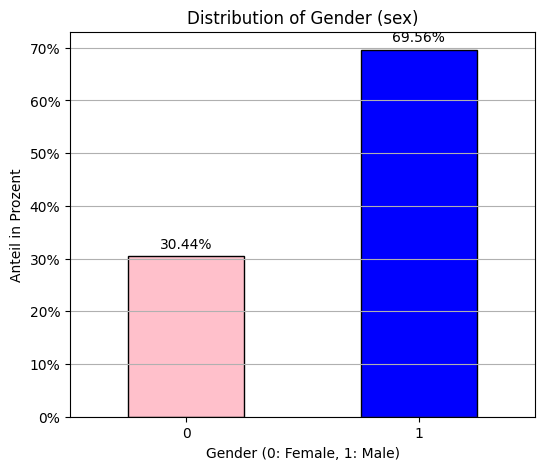

0    30.439024
1    69.560976
Name: sex, dtype: float64

In [12]:
# Display the distribution of the 'sex' variable
sex_distribution = heart_data['sex'].value_counts(normalize=True).sort_index() * 100  # Prozentuale Verteilung


plt.figure(figsize=(6, 5))
ax = sex_distribution.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')
plt.title('Distribution of Gender (sex)')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Anteil in Prozent')
plt.xticks(rotation=0)
plt.grid(axis='y')


for i, percent in enumerate(sex_distribution):
    plt.text(i, percent + 1, f'{percent:.2f}%', ha='center', va='bottom')  # Anpassung der Position für die Prozentangabe


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

sex_distribution



#### Hypothese für den χ²-Test:

H0: Es gibt keine Beziehung zwischen dem Brustschmerztyp und dem Geschlecht der Patienten.
H1:Es gibt eine Beziehung zwischen dem Brustschmerztyp und dem Geschlecht der Patienten.

#### χ²-Test durchführen

In [13]:
# Create a contingency table for 'cp' and 'sex'
contingency_table = pd.crosstab(heart_data['cp'], heart_data['sex'])

chi2_result = stats.chi2_contingency(contingency_table)

chi2_statistic, p_value, dof, expected = chi2_result

chi2_statistic, p_value


(19.392919905275754, 0.00022673403108398679)

Da der p-Wert deutlich kleiner als 0,05 ist, müssen wir die Nullhypothese ablehnen. Dies deutet darauf hin, dass es einen signifikanten Zusammenhang zwischen dem Brustschmerztyp und dem Geschlecht der Patienten gibt.